In [1]:
# This program uses MACD info to determine when to buy or sell stock


In [2]:
# import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [5]:
# store data and show it
df = pd.read_csv('Data/TSLA.csv')
# change index to be ordered by date
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
# show the data
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000


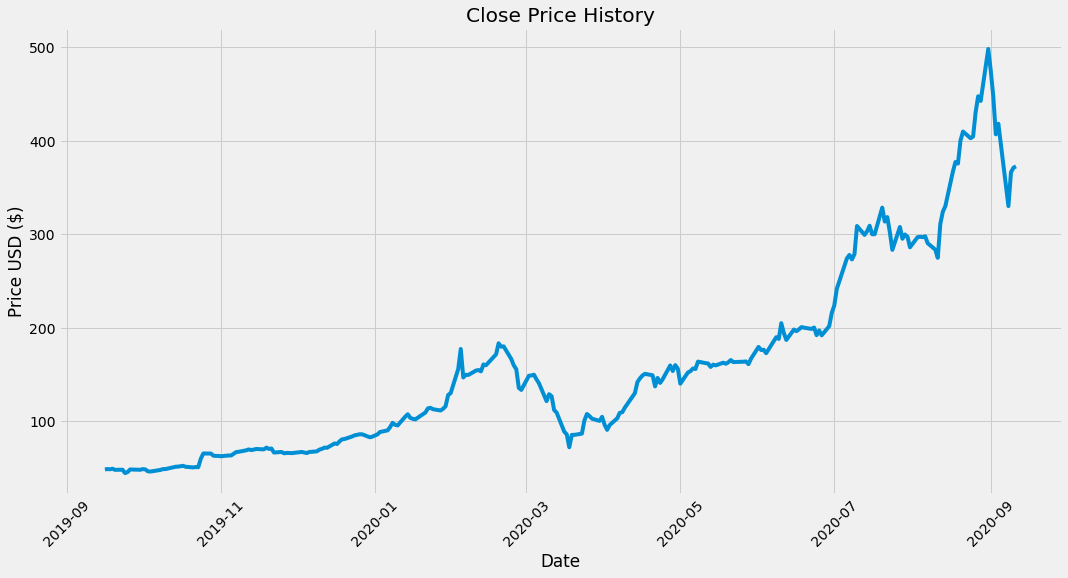

In [6]:
# visually show the stock price
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [7]:
# calculate the MACD and EMA indicators
# calcualte the short term EMA
shortEMA = df.Close.ewm(span=12, adjust=False).mean()
# calculate the long term EMA
longEMA = df.Close.ewm(span=26, adjust=False).mean()
# calculate the MACD line
MACD = shortEMA - longEMA
# calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

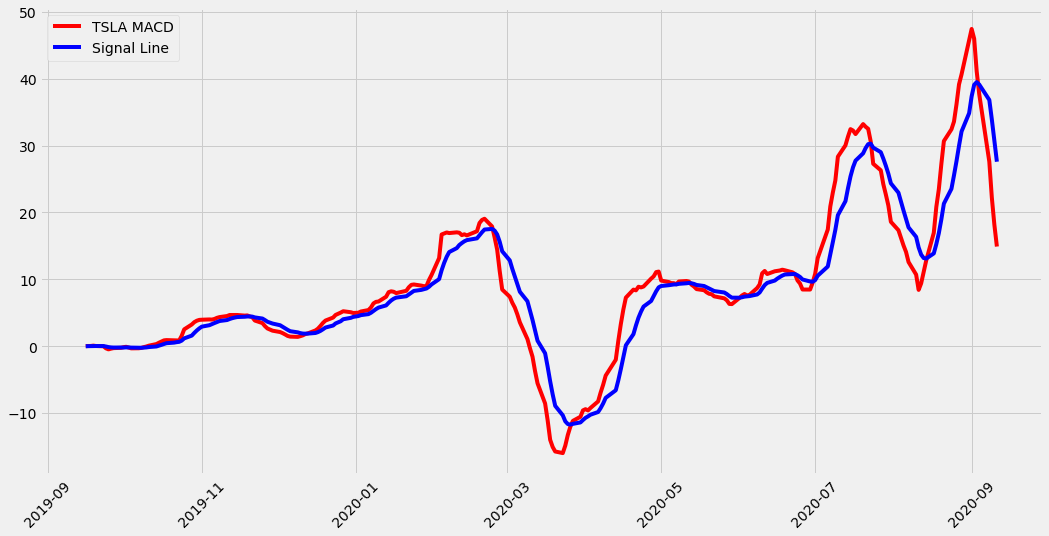

In [9]:
# plot the above values in a chart
plt.figure(figsize=(16, 8))
plt.plot(df.index, MACD, label = 'TSLA MACD', color = 'red')
plt.plot(df.index, signal, label = 'Signal Line', color = 'blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [10]:
# create new columns 
df['MACD'] = MACD 
df['Signal Line'] = signal 
# show the data
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500,0.000000,0.000000
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000,0.031590,0.006318
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000,0.035239,0.012102
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000,0.087315,0.027145
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000,0.031712,0.028058


In [11]:
# function that signals when to buy or sell stock
def buy_sell(signal):

    # lists to store buy and sell dates
    buy = []
    sell = []
    # determines when the price changes
    flag = -1 

    for i in range(0, len(signal)):

        # if the MACD line has crosses above the Signal Line:
        if signal['MACD'][i] > signal['Signal Line'][i]:
            sell.append(np.nan) # don't sell
            if flag != 1: # flag the event as buy with the date of buy
                buy.append(signal['Close'][i])
                flag = 1
            else: # otherwise just append null to the buy list
                buy.append(np.nan)
        # else if the signal line has crossed above the MACD line:
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            buy.append(np.nan) # don't buy
            if flag != 0: # flag event as sell with date of sale
                sell.append(signal['Close'][i])
                flag = 0
            else: # other wise just append null to sell list
                sell.append(np.nan)
        else: # else just append null to both lists
            buy.append(np.nan)
            sell.append(np.nan)
    
    return (buy, sell) # return both lists

In [13]:
# create and buy and sell column in data set
a = buy_sell(df)
# set BSP to the buy list, SSP to sell list from buy_sell output
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [14]:
# show the data
df.head(9)

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500,0.000000,0.000000,NaN,NaN
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000,0.031590,0.006318,48.958,NaN
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000,0.035239,0.012102,NaN,NaN
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000,0.087315,0.027145,NaN,NaN
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000,0.031712,0.028058,NaN,NaN
2019-09-23,2019-09-23,48.000000,49.035999,47.844002,48.245998,48.245998,21701000,-0.002480,0.021950,NaN,48.245998
2019-09-24,2019-09-24,48.304001,48.397999,44.521999,44.641998,44.641998,64457500,-0.316740,-0.045788,NaN,NaN
2019-09-25,2019-09-25,44.911999,45.796001,43.672001,45.740002,45.740002,47135500,-0.471755,-0.130981,NaN,NaN
2019-09-26,2019-09-26,46.132000,48.661999,45.480000,48.512001,48.512001,59422500,-0.366701,-0.178125,NaN,NaN


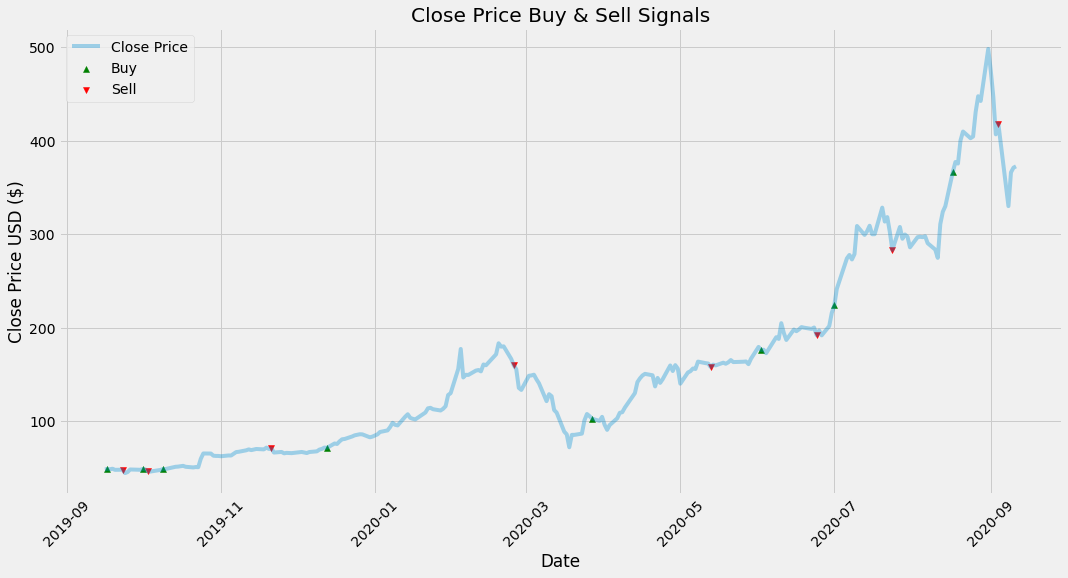

In [16]:
# visualize the stock buy and sell signals
plt.figure(figsize=(16,8))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()